In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import paths

In [117]:
# display all columns
pd.set_option('display.max_columns', None)

In [118]:
prosody_df = pd.read_csv(paths.prosodical_path)
prosody_df.head(10)

,participant&question,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,loudness
0,P1Q1,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,0.773830,51.926063,3.969125,321.402957,268.646391,276.945246,35.146923,72.867806,58.684285,7.887426,54.273029,37.720883,14.183521,18.594777,626.471748,1812.870522,2726.754871959634,369.513757,460.554585,490.54754746489607,626.471748,1812.870522,2726.754872,2.893779,4.352558,287.839277,376.685246,397.972695,1.308665,1.382621,0.02312,0.17719,0.01236,0.007843,0.38001,136,0.42117,0.000342,55,1.290667,0.494,27.176,138,274.562,257.247,25.872,20.106,91,4722.964842,NaN
1,P1Q2,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,0.717333,38.651156,35.848985,322.447514,266.545551,272.792458,36.601937,73.186800,59.926280,8.233813,55.649229,36.584863,13.260520,17.537571,613.316817,1809.325807,2705.6089845812653,358.067588,444.272467,496.4023416308512,613.316817,1809.325807,2705.608985,2.950067,4.411438,277.213155,382.568519,388.227010,1.380052,1.400464,0.02209,0.18462,0.01195,0.007664,0.36594,97,0.38674,0.000444,40,1.866667,0.522,20.875,100,268.613,270.193,24.647,15.886,71,2928.482587,NaN
2,P1Q3,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441737,120.457848,1.068376,43.568823,74.929423,324.895927,268.191602,275.472841,36.927892,75.155320,59.258690,8.469902,54.498423,38.227429,15.896630,20.656897,651.605273,1817.708699,2741.2750774186056,412.497041,480.247670,524.4368462156812,651.605273,1817.708699,2741.275077,2.789586,4.206957,290.250003,397.206578,402.355067,1.368498,1.386236,0.02201,0.16783,0.01187,0.007862,0.45340,112,0.43099,0.000475,44,2.624000,0.505,22.229,114,283.912,203.506,23.720,16.951,79,3528.448990,NaN
3,P1Q4,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,1.121487,23.408531,80.772592,173.795065,119.169824,124.259886,37.055382,72.416516,59.795717,9.313020,52.229616,35.361134,12.620799,20.186900,701.853764,1843.846315,2775.7994803965344,490.418838,465.188272,532.2699037728337,701.853764,1843.846315,2775.799480,2.627109,3.954954,334.535409,410.480229,394.666547,1.227016,1.179745,0.02338,0.16456,0.01257,0.007714,0.47179,55,0.46003,0.000907,24,2.933333,0.507,12.171,55,100.655,83.172,13.148,5.044,36,1924.546685,NaN
4,P1Q5,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,1.078493,13.246792,51.009207,169.719334,133.490706,143.396708,36.358038,69.970287,58.123224,8.342691,52.022604,33.612249,11.847063,17.947683,681.211163,1836.203738,2810.800836731448,460.319969,521.671288,531.5153625928741,681.211163,1836.203738,2810.800837,2.695499,4.126181,332.987564,422.043812,383.323037,1.267446,1.151163,0.02617,0.18581,0.01419,0.007702,0.44335,32,0.46576,0.001570,12,2.848000,0.628,7.541,32,129.591,117.119,14.706,11.073,19,1322.366516,NaN
5,P3Q1,61.736021,0.020427,0.000331,73.871085,399.832743,125.357086,64.499036,315.159934,95.831823,1.976363,61.708635,6.972889,325.961658,274.475657,304.000920,33.830400,73.498182,59.180374,8.301686,53.802646,39.667782,14.317808,19.695536,692.522404,1868.777256,2968.456838501223,487.563119,657.182553,652.3239677378867,692.522404,1868.777256,2968.456839,2.698508,4.286442,355.637432,472.439494,443.973303,1.328430,1.248387,0.03693,0.20373,0.01894,0.008134,0.55689,171,0.63073,0.000482,50,3.296000,0.782,39.115,182,307.350,308.024,

### Data Cleaning

In [119]:
# loudness column is empty, drop it
prosody_df.drop(columns=['loudness'], inplace=True)

In [120]:
prosody_df.replace('--undefined--', None, inplace=True)

In [121]:
# Split 'participant&question' into 'participant' and 'question' columns
prosody_df[['InterviewID', 'question']] = prosody_df['participant&question'].str.split('Q', expand=True)

# Drop the original 'participant&question' column
prosody_df = prosody_df.drop('participant&question', axis=1)

In [122]:
prosody_df.head(10)

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,InterviewID,question
0,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,0.773830,51.926063,3.969125,321.402957,268.646391,276.945246,35.146923,72.867806,58.684285,7.887426,54.273029,37.720883,14.183521,18.594777,626.471748,1812.870522,2726.754871959634,369.513757,460.554585,490.54754746489607,626.471748,1812.870522,2726.754872,2.893779,4.352558,287.839277,376.685246,397.972695,1.308665,1.382621,0.02312,0.17719,0.01236,0.007843,0.38001,136,0.42117,0.000342,55,1.290667,0.494,27.176,138,274.562,257.247,25.872,20.106,91,4722.964842,P1,1
1,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,0.717333,38.651156,35.848985,322.447514,266.545551,272.792458,36.601937,73.186800,59.926280,8.233813,55.649229,36.584863,13.260520,17.537571,613.316817,1809.325807,2705.6089845812653,358.067588,444.272467,496.4023416308512,613.316817,1809.325807,2705.608985,2.950067,4.411438,277.213155,382.568519,388.227010,1.380052,1.400464,0.02209,0.18462,0.01195,0.007664,0.36594,97,0.38674,0.000444,40,1.866667,0.522,20.875,100,268.613,270.193,24.647,15.886,71,2928.482587,P1,2
2,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441737,120.457848,1.068376,43.568823,74.929423,324.895927,268.191602,275.472841,36.927892,75.155320,59.258690,8.469902,54.498423,38.227429,15.896630,20.656897,651.605273,1817.708699,2741.2750774186056,412.497041,480.247670,524.4368462156812,651.605273,1817.708699,2741.275077,2.789586,4.206957,290.250003,397.206578,402.355067,1.368498,1.386236,0.02201,0.16783,0.01187,0.007862,0.45340,112,0.43099,0.000475,44,2.624000,0.505,22.229,114,283.912,203.506,23.720,16.951,79,3528.448990,P1,3
3,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,1.121487,23.408531,80.772592,173.795065,119.169824,124.259886,37.055382,72.416516,59.795717,9.313020,52.229616,35.361134,12.620799,20.186900,701.853764,1843.846315,2775.7994803965344,490.418838,465.188272,532.2699037728337,701.853764,1843.846315,2775.799480,2.627109,3.954954,334.535409,410.480229,394.666547,1.227016,1.179745,0.02338,0.16456,0.01257,0.007714,0.47179,55,0.46003,0.000907,24,2.933333,0.507,12.171,55,100.655,83.172,13.148,5.044,36,1924.546685,P1,4
4,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,1.078493,13.246792,51.009207,169.719334,133.490706,143.396708,36.358038,69.970287,58.123224,8.342691,52.022604,33.612249,11.847063,17.947683,681.211163,1836.203738,2810.800836731448,460.319969,521.671288,531.5153625928741,681.211163,1836.203738,2810.800837,2.695499,4.126181,332.987564,422.043812,383.323037,1.267446,1.151163,0.02617,0.18581,0.01419,0.007702,0.44335,32,0.46576,0.001570,12,2.848000,0.628,7.541,32,129.591,117.119,14.706,11.073,19,1322.366516,P1,5
5,61.736021,0.020427,0.000331,73.871085,399.832743,125.357086,64.499036,315.159934,95.831823,1.976363,61.708635,6.972889,325.961658,274.475657,304.000920,33.830400,73.498182,59.180374,8.301686,53.802646,39.667782,14.317808,19.695536,692.522404,1868.777256,2968.456838501223,487.563119,657.182553,652.3239677378867,692.522404,1868.777256,2968.456839,2.698508,4.286442,355.637432,472.439494,443.973303,1.328430,1.248387,0.03693,0.20373,0.01894,0.008134,0.55689,171,0.63073,0.000482,50,3.296000,0.782,39.115,182,307.350,308.024,41.655,38.960,95,8725.431952,P3,1


### Standardization

In [123]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your numeric features and transform them
numeric_columns = prosody_df.drop(columns=['InterviewID', 'question'])
# get all non numeric columns
numeric_columns_normalized = scaler.fit_transform(numeric_columns)
prosody_df[numeric_columns.columns] = numeric_columns_normalized


### Get Average Value for all Features per Participant

In [124]:
prosody_df = prosody_df.groupby('InterviewID').mean().reset_index()

/tmp/ipykernel_9302/2837288634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prosody_df = prosody_df.groupby('InterviewID').mean().reset_index()


### Handle Missing Values

In [125]:
# print columns with missing values
print(prosody_df.columns[prosody_df.isna().any()].tolist())
prosody_df.fillna(prosody_df.mean(numeric_only=True), inplace=True)
print(prosody_df.columns[prosody_df.isna().any()].tolist())

[]
[]


In [126]:
prosody_df.head(10)

,InterviewID,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,PercentBreaks,speakRate,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall
0,P1,-0.642138,-0.040830,-0.020382,0.452130,-0.601528,-0.919493,-1.278376,-0.912135,-0.863927,-0.318897,-0.642138,-0.215402,-0.666922,0.270135,0.278842,0.537410,0.652450,1.138687,1.116237,0.969894,0.422382,-0.410107,-0.066777,-0.165699,-0.265594,-1.646851,-0.577203,-1.787111,-1.824195,-0.165699,-0.265594,-1.634630,0.029979,-0.605358,-0.791549,-0.006357,-0.339189,0.865972,0.832625,-0.141514,-0.000550,-0.102522,0.747629,-0.239617,-0.565115,-0.392271,0.484542,-0.424402,-0.287510,-0.502778,-0.618196,-0.602085,-0.052365,-0.480524,-0.917001,-0.919663,-0.505720,-0.473545
1,P10,0.555389,0.006366,-0.007840,0.056256,-0.470700,-1.305467,-1.226839,-1.041778,-1.188238,-0.477432,0.555381,-0.707866,-0.464560,0.689032,0.645213,0.101634,0.702964,1.331958,2.063506,0.839565,0.657952,-0.593008,0.127911,0.365921,0.095782,-0.450681,-0.015780,0.013508,0.138746,0.365921,0.095782,-0.443081,-0.410916,-0.644091,0.750896,1.529072,0.280780,0.237697,-0.743748,-0.983606,-0.835849,-1.067879,1.374120,-0.402154,0.107987,-0.579689,-0.585034,0.281304,-0.196277,0.195156,0.360402,0.123414,0.330649,0.183931,-0.515950,-0.514458,0.427510,-0.200897
2,P11,-0.191746,-0.050653,-0.055460,-0.086577,0.448399,0.431060,-0.462180,-0.255749,0.450376,-0.723544,-0.191722,0.359730,0.448904,0.005978,-0.046437,-0.125365,-0.223949,0.135461,0.144982,0.448220,-0.170094,-0.616062,-0.737054,-0.060498,-0.041261,-0.137687,-0.901689,-0.938745,-0.549610,-0.060498,-0.041261,-0.131295,-0.005154,-0.049682,-1.317213,-0.093512,-0.622381,1.504569,1.328258,-1.025157,-0.905616,-0.983697,-0.575784,-1.129791,-0.197580,-0.973511,-0.429548,-0.043934,0.041957,-0.497689,-0.270992,-0.199030,-0.715116,-0.168247,-0.410520,-0.718393,-0.079680,-0.233671
3,P12,-0.594349,-0.048856,-0.042918,-0.074395,-0.943634,0.300819,-0.111605,0.264322,0.456527,-0.503545,-0.594330,0.018392,-0.895272,-0.997268,-1.073028,-0.917573,0.622502,0.597228,0.616350,0.370263,1.010820,0.312176,0.476367,-0.112252,-1.481683,-0.783356,-0.011433,-0.451939,1.145761,-0.112252,-1.481683,-0.774470,-0.789562,-0.290766,0.242551,0.709171,0.891443,0.211293,0.696374,-0.856260,-1.372043,-0.897876,-0.489165,-0.612795,-0.503147,-0.705223,0.073853,-0.761914,0.808247,1.127189,-0.332941,-0.531550,-1.157391,-1.180469,-0.241675,0.653899,-0.603777,-0.266079
4,P13,-0.174596,-0.063485,-0.073923,0.099006,-0.798205,0.304346,-0.066676,0.042524,0.569899,-0.118005,-0.174605,-0.106867,-0.788487,-0.884239,-1.060828,-1.518823,-1.475947,-1.510760,-0.583627,-1.438218,-0.826686,-0.603934,-0.584310,-0.916244,0.998161,0.838010,0.331575,0.965433,2.368880,-0.916244,0.998161,0.803097,1.791402,1.513213,0.496223,-0.502354,0.048254,-0.910595,-0.659533,-0.302339,-0.257556,-0.270885,-0.494429,0.011439,-0.272369,0.127862,-0.130390,-0.363036,-0.124956,0.093374,-0.301250,-0.291733,-0.520819,-0.840319,0.549051,-0.229353,-0.198025,-0.874728
5,P14,-0.403406,-0.040821,-0.032726,0.141218,0.471368,0.568014,0.158154,-0.051642,0.531385,-0.296079,-0.403396,1.691379,0.427167,-0.087357,-0.097119,-0.247674,0.793816,0.788862,0.602586,0.685077,0.897010,0.358865,0.400314,0.620181,2.207628,1.733410,0.206906,0.132312,0.688451,0.620181,2.207628,1.732575,0.466098,0.030436,0.706878,-0.054163,-0.299747,-0.798932,-1.359852,-0.485585,-1.268883,-0.514685,-0.660761,-0.274211,-0.396305,-0.184419,0.084220,-0.283261,-0.379199,-0.169078,-0.310169,-0.420710,0.290634,-0.227521,-0.168941,-0.119175

In [127]:
prosody_df.to_csv('pp_data/prosodical_features.csv', index=False)

### PCA For Dimensionality Reduction

Total number of features before PCA: 58
Total number of features after PCA: 14


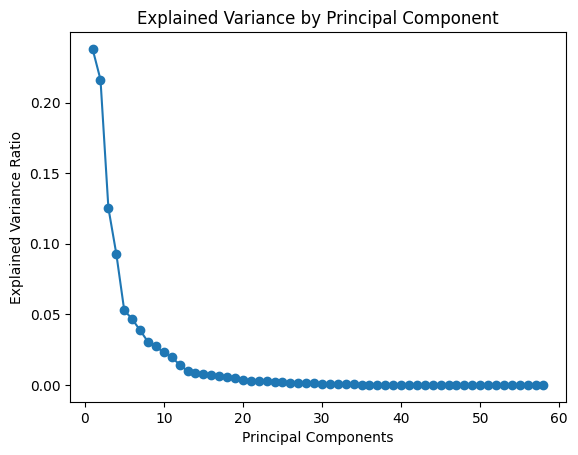

In [128]:
# Create a PCA instance
pca = PCA()

# Fit PCA to the standardized data
numeric_columns = prosody_df.drop(columns=['InterviewID'])
pca.fit(numeric_columns)

# Determine the optimal number of components (optional)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
n_components = len(cumulative_variance[cumulative_variance <= 0.95])  # Set your desired explained variance threshold (e.g., 95%)

# Fit PCA again with the optimal number of components
print(f"Total number of features before PCA: {len(numeric_columns.columns)}")
print(f"Total number of features after PCA: {n_components}")
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(numeric_columns)

# Visualize the explained variance by each principal component (optional)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()

In [129]:
pca_df = pd.DataFrame(X_pca)

num_components = X_pca.shape[1]
column_names = [f'Prosody_PC{i}' for i in range(1, num_components + 1)]
pca_df.columns = column_names

pca_df['InterviewID'] = prosody_df['InterviewID']

In [130]:
pca_df.head(10)

,Prosody_PC1,Prosody_PC2,Prosody_PC3,Prosody_PC4,Prosody_PC5,Prosody_PC6,Prosody_PC7,Prosody_PC8,Prosody_PC9,Prosody_PC10,Prosody_PC11,Prosody_PC12,Prosody_PC13,Prosody_PC14,InterviewID
0,-2.781319,-0.012587,-3.097089,1.209345,1.921517,-0.732205,0.288429,1.019076,-1.867791,-0.216973,-0.387758,-1.238397,0.263468,0.280755,P1
1,-1.685854,2.071138,-2.570760,-2.281101,1.411358,-0.740619,0.592575,-1.047877,0.333436,-0.964514,-0.907268,-0.173282,0.885749,0.268698,P10
2,-2.664966,-2.071171,-1.083365,-0.212769,0.389764,1.356527,-0.712991,-0.644766,-0.206227,0.327528,1.013520,-0.400801,-0.577346,-0.306425,P11
3,-1.279975,-1.703643,-1.504506,-0.113327,1.362216,-2.475340,-1.341821,0.514653,2.008308,1.011885,-0.946712,1.692996,-0.991347,-0.787402,P12
4,2.391669,-2.812355,0.087648,0.237040,-3.463055,-0.996102,1.068576,-1.204319,1.369483,-0.261255,-0.073850,0.234486,-0.297661,-0.209216,P13
5,1.233397,-1.968115,1.375424,-3.059851,1.314384,-0.555711,2.152818,-1.164848,-0.137043,-1.413418,0.719612,-0.839100,-0.121547,-0.602518,P14
6,-2.551761,1.071598,1.223307,-0.956146,-0.630526,0.693169,-0.398034,0.264118,-0.394110,-1.521544,0.685065,0.334014,0.500224,0.029007,P15
7,-0.940272,-0.728475,2.234623,-3.794798,-1.206563,0.327785,0.127229,0.054386,-0.932285,-0.766541,-0.083666,0.195642,-0.368576,0.601997,P16
8,4.569579,-0.336785,2.272531,-2.739974,0.411293,-2.713817,-0.764359,-0.244080,-0.311477,0.699741,1.750850,2.521161,-0.192225,-0.460951,P17
9,3.897369,-2.130717,1.437304,0.052988,-0.310018,-0.172202,-0.027466,-1.667791,1.663207,-0.326260,0.265999,1.158004,0.541218,0.718157,P20


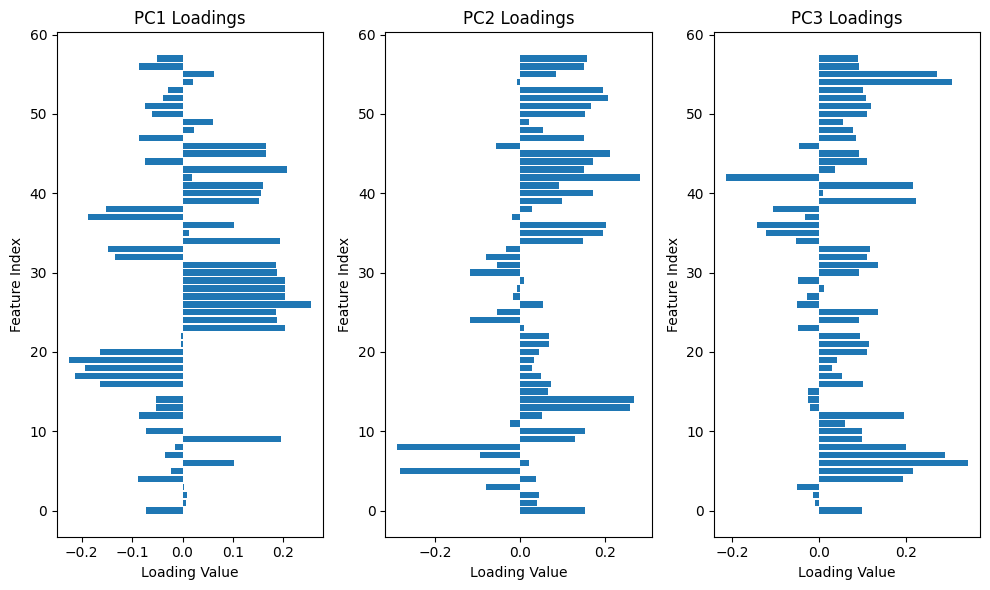

In [131]:
# Access the loadings
loadings = pca.components_

# Visualize the loadings for the first few PCs
n_components_to_visualize = 3  # Change this number as needed
plt.figure(figsize=(10, 6))
for i in range(n_components_to_visualize):
    plt.subplot(1, n_components_to_visualize, i + 1)
    plt.barh(range(len(loadings[i])), loadings[i])
    plt.title(f'PC{i + 1} Loadings')
    plt.xlabel('Loading Value')
    plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()

In [132]:
# pca_df.to_csv('pp_data/prosodical_features.csv', index=False)